In [16]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten, AveragePooling2D
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
num_classes = 10
img_rows, img_cols, img_ch = 28, 28, 1
input_shape = (img_rows, img_cols, img_ch)

In [5]:
x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)

In [20]:
def buildLeNet5():
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(6, kernel_size=(5, 5), padding='same', activation='tanh'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(120, kernel_size=(5, 5), activation='tanh'))
    model.add(Flatten())
    model.add(Dense(84, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
    
    # Ojo que si quisiéramos tocar los parámetros del optimizador podríamos pasar 
    # directamente tf.keras.optimizers.SGD(...)
    return model

In [21]:
model_lenet5 = buildLeNet5()

In [22]:
model_lenet5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

In [23]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='./log_dir', histogram_freq=1)]

In [24]:
model_lenet5.fit(x_train, y_train, batch_size=32, epochs=100,
         validation_data=(x_test, y_test), callbacks=callbacks,
         verbose=1)

Epoch 1/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6338 - accuracy: 0.8361 - val_loss: 0.2977 - val_accuracy: 0.9154
Epoch 2/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2624 - accuracy: 0.9234 - val_loss: 0.2090 - val_accuracy: 0.9394
Epoch 3/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1935 - accuracy: 0.9433 - val_loss: 0.1597 - val_accuracy: 0.9532
Epoch 4/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1504 - accuracy: 0.9550 - val_loss: 0.1258 - val_accuracy: 0.9640
Epoch 5/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1223 - accuracy: 0.9635 - val_loss: 0.1045 - val_accuracy: 0.9702
Epoch 6/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1029 - accuracy: 0.9696 - val_loss: 0.0928 - val_accuracy: 0.9714
Epoch 7/100
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0892 - accuracy: 0.9737 - val_loss: 0

In [26]:
outputs = [layer.output for layer in model_lenet5.layers]

In [29]:
out_function = tf.keras.backend.function([model_lenet5.input], [output for output in outputs])

In [31]:
x_train.shape

(60000, 28, 28, 1)

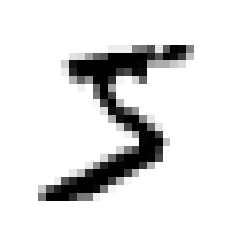

In [79]:
plt.imshow(x_train[[0]][0, :, :, 0], cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [113]:
def shows_layer_output(layer_idx, element):

    layer_outputs = out_function(x_train[[element]])[layer_idx]
    number_of_filters = layer_outputs.shape[-1]

    columns = 3
    rows = number_of_filters // columns + 1*(number_of_filters % columns != 0)

    fig = plt.figure(figsize=(10, 10))

    for i in range(number_of_filters):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(layer_outputs[0, :, :, i], cmap=matplotlib.cm.binary, interpolation='nearest')
        plt.axis('off')
    plt.show()

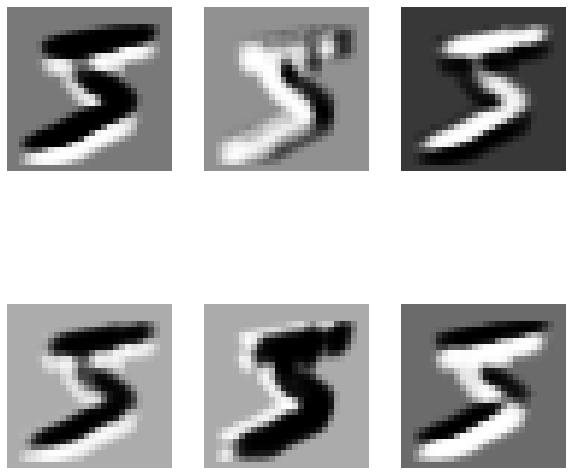

In [114]:
shows_layer_output(0, 0)

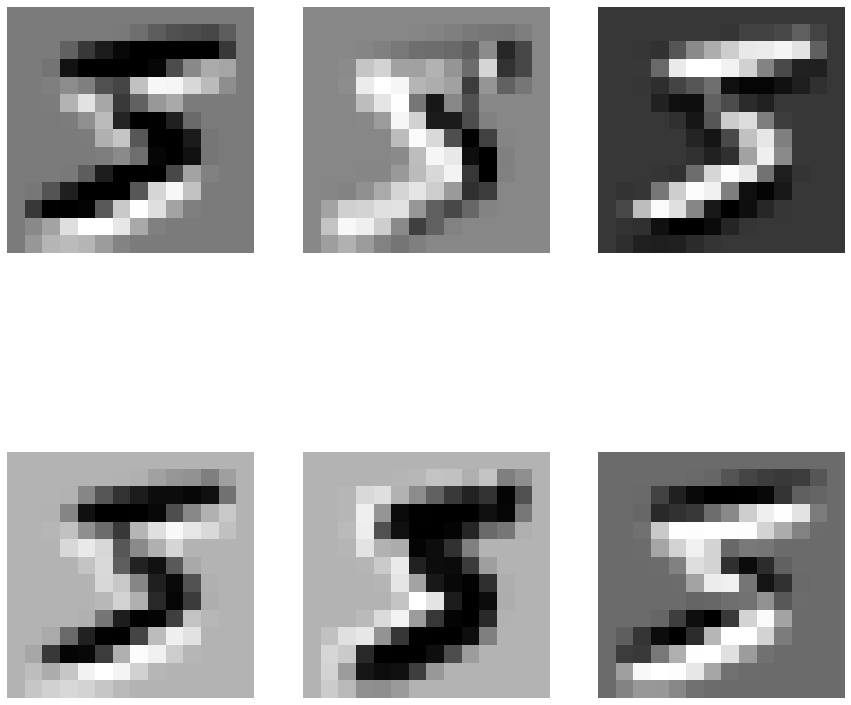

In [109]:
shows_layer_output(1, 0)

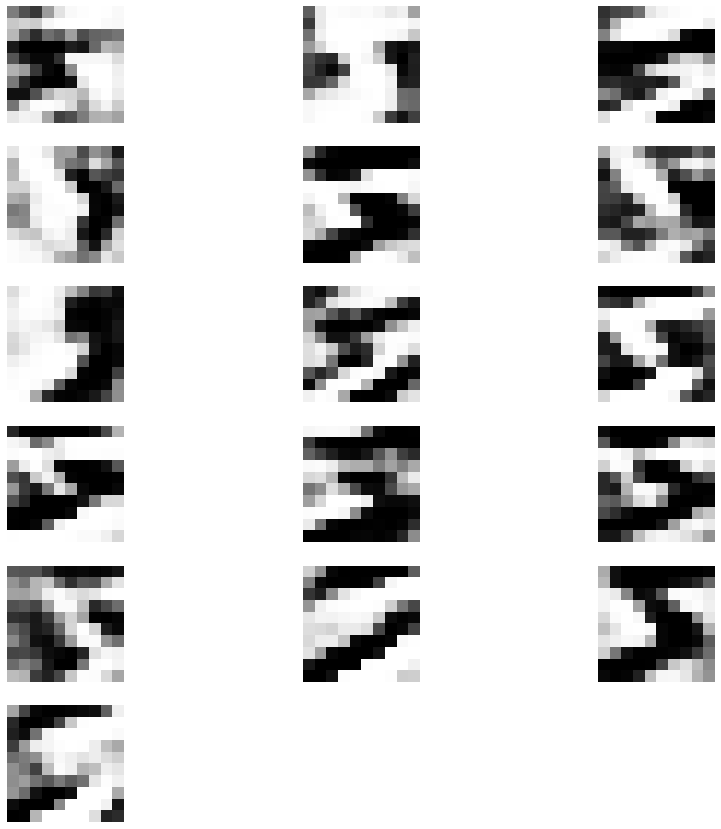

In [110]:
shows_layer_output(2, 0)

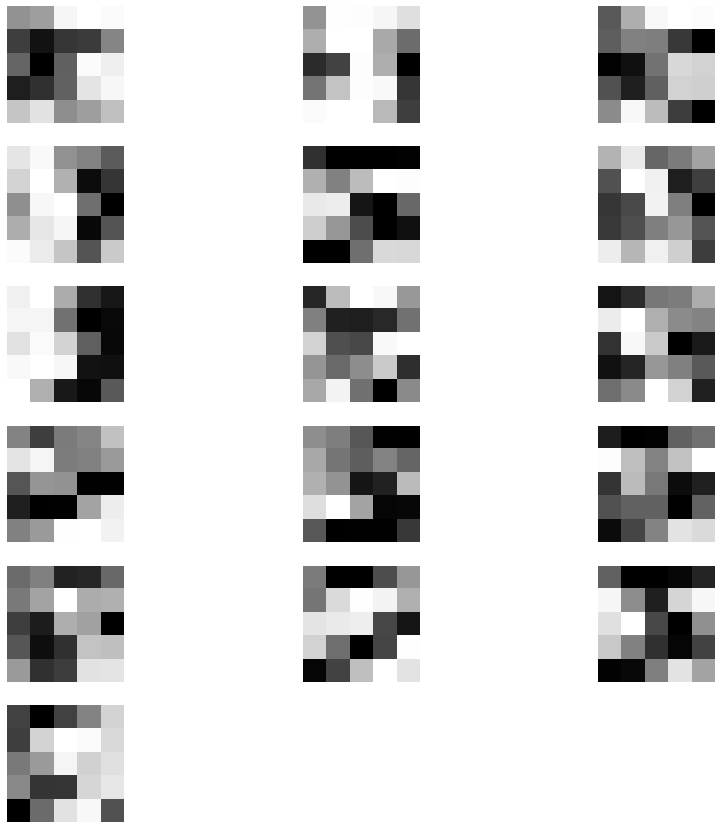

In [111]:
shows_layer_output(3, 0)

In [115]:
out_function(x_train[[0]])[4].shape

(1, 1, 1, 120)

In [74]:
out_function(x_train[[0]])[5].shape

(1, 120)

In [75]:
out_function(x_train[[0]])[6].shape

(1, 84)

In [76]:
out_function(x_train[[0]])[7].shape

(1, 10)

In [119]:
import numpy as np

print("The number predicted by the LeNet5 NN is: {}".format(np.argmax(out_function(x_train[[0]])[7])))

The number predicted by the LeNet5 NN is: 5
